In [1]:
import numpy as np
import PIL.Image as Im
import matplotlib.pyplot as plt
import math
import scipy as sp
import scipy.signal

In [2]:
import matlab.engine
eng = matlab.engine.start_matlab()

# 1 Wiener filtering

### Question 1
$
r_n(x,0) = \sigma_n^2 * \delta(x,0) = /\text{formula collection, } \delta(x,0) = 1 / = \sigma_n^2 \implies
S_N(u,v) = \sigma_n^2
$


$
r_f(x,0) = \sigma_f^2 \cdot e^{\ln(\rho^{|x|})} = \sigma_f^2 \cdot e^{|x| \cdot \ln(\rho)} = \sigma_f^2 \cdot e^{-(-\ln\rho \cdot |x|)} = /\text{formula collection}/ = \frac{2(-\ln\rho)}{(-\ln\rho)^2 + (2\pi u)^2} \implies 
S_F(u,v) = \sigma_f^2 \cdot \frac{2(-ln\rho)}{(-ln\rho)^2 + (2\pi u)^2} 
$

Therefore:
\begin{align*}
S_F(u,v) &= \sigma_f^2 \cdot \frac{2(-ln\rho)}{(-ln\rho)^2 + (2\pi u)^2} \\
S_N(u,v) &= \sigma_n^2
\end{align*}

### Question 2
A inverse filter is defined as $\frac{1}{H(u,v)}$.

We have 
$
W(u,v)=\frac{H^{*}(u,v)}{|H(u,v)|^{2}+r\cdot S_{N}(u,v)/S_{F}(u,v)} = /r=0/ =
\frac{H^{*}(u,v)}{|H(u,v)|^{2}} =
\frac{H^{*}(u,v)}{H(u,v)\cdot H^{*}(u,v)} =
\frac{1}{H(u,v)}
$

In [3]:
def mat_d(x):
    return matlab.double(x.tolist())

def wiener(f, h0, snr, rho, r):
    g = np.array(eng.circconv(matlab.double(f.tolist()), matlab.double(h0.tolist())))
    h = np.array(eng.addnoise(matlab.double(g.tolist()), matlab.double([snr])))
    return h, np.array(eng.wiener(mat_d(h), mat_d(h0), matlab.double([snr]), matlab.double([rho]), matlab.double([r])))


In [4]:


f = np.array(Im.open("lab7files/skylt.tif"))
h0 = np.ones((5,5)) / 25.0
snr = 20
rho = 0.8
r = 1.0


h, fhat = wiener(f, h0, snr, rho, r)

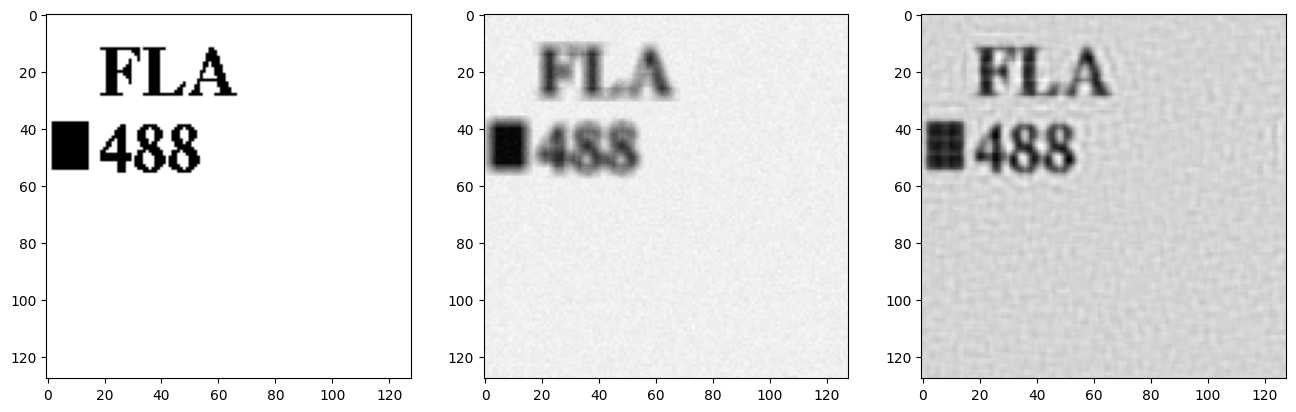

In [5]:
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(f, cmap="gray")

plt.subplot(132)
plt.imshow(h, cmap="gray")

plt.subplot(133)
plt.imshow(fhat, cmap="gray")

### Question 3
Yes somewhat, the quality of the text is improved

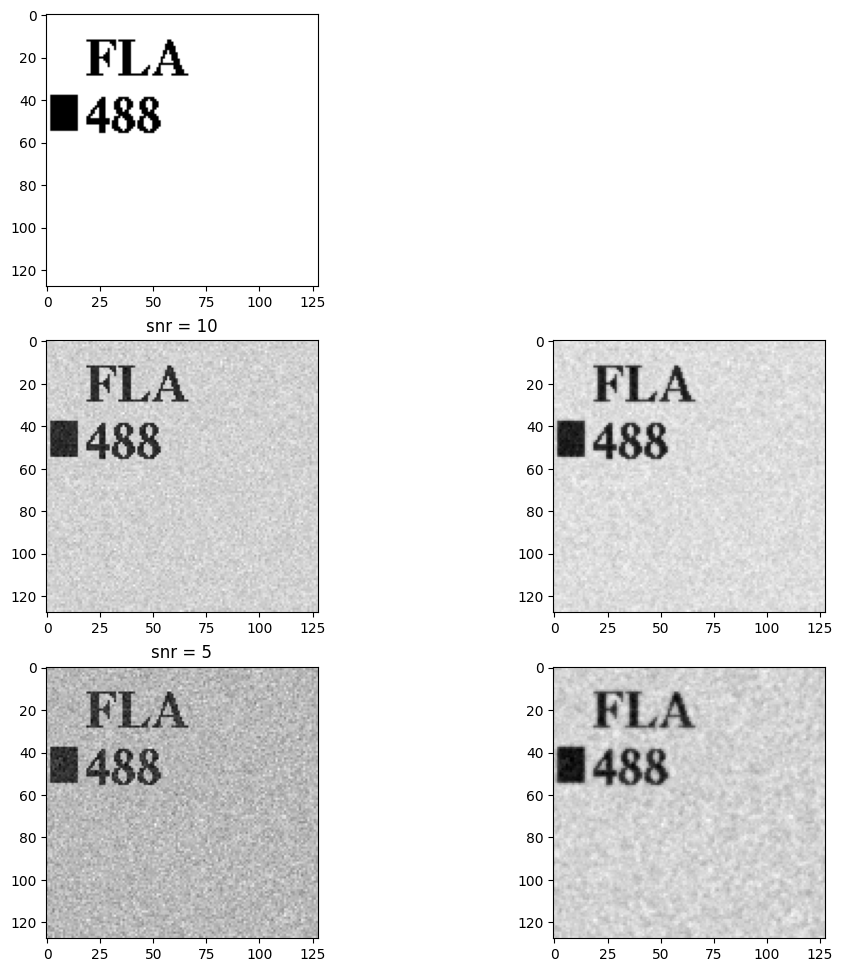

In [6]:
h1 = np.ones(1)
snr_1 = 10
snr_2 = 5
rho = 0.8
r = 1.0

h_1, fhat_1 = wiener(f, h1, snr_1, rho, r)
h_2, fhat_2 = wiener(f, h1, snr_2, rho, r)

plt.figure(figsize=(12,12))
plt.subplot(321)
plt.imshow(f, cmap="gray")

plt.subplot(323)
plt.imshow(h_1, cmap="gray")
plt.title("snr = 10")

plt.subplot(324)
plt.imshow(fhat_1, cmap="gray")

plt.subplot(325)
plt.imshow(h_2, cmap="gray")
plt.title("snr = 5")

plt.subplot(326)
plt.imshow(fhat_2, cmap="gray")

### Question 4
The text becomes more blurred, but the background noise is slightly smoothed out.

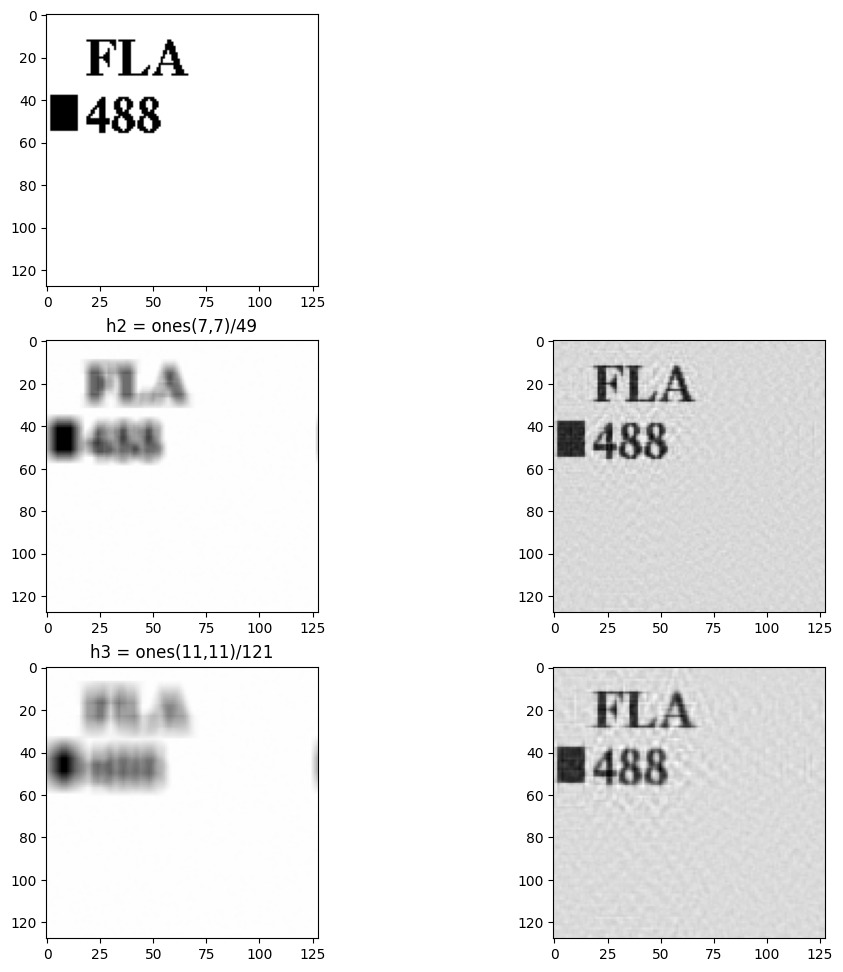

In [7]:
h2 = np.ones((7,7))/49
h3 = np.ones((11,11))/121
snr = 40
rho = 0.8
r = 1.0

h_2, fhat_2 = wiener(f, h2, snr, rho, r)
h_3, fhat_3 = wiener(f, h3, snr, rho, r)

plt.figure(figsize=(12,12))
plt.subplot(321)
plt.imshow(f, cmap="gray")

plt.subplot(323)
plt.imshow(h_2, cmap="gray")
plt.title("h2 = ones(7,7)/49")

plt.subplot(324)
plt.imshow(fhat_2, cmap="gray")

plt.subplot(325)
plt.imshow(h_3, cmap="gray")
plt.title("h3 = ones(11,11)/121")

plt.subplot(326)
plt.imshow(fhat_3, cmap="gray")

### Question 5
The result is really good, you completely reconstruct the text. Background still a bit noisy.

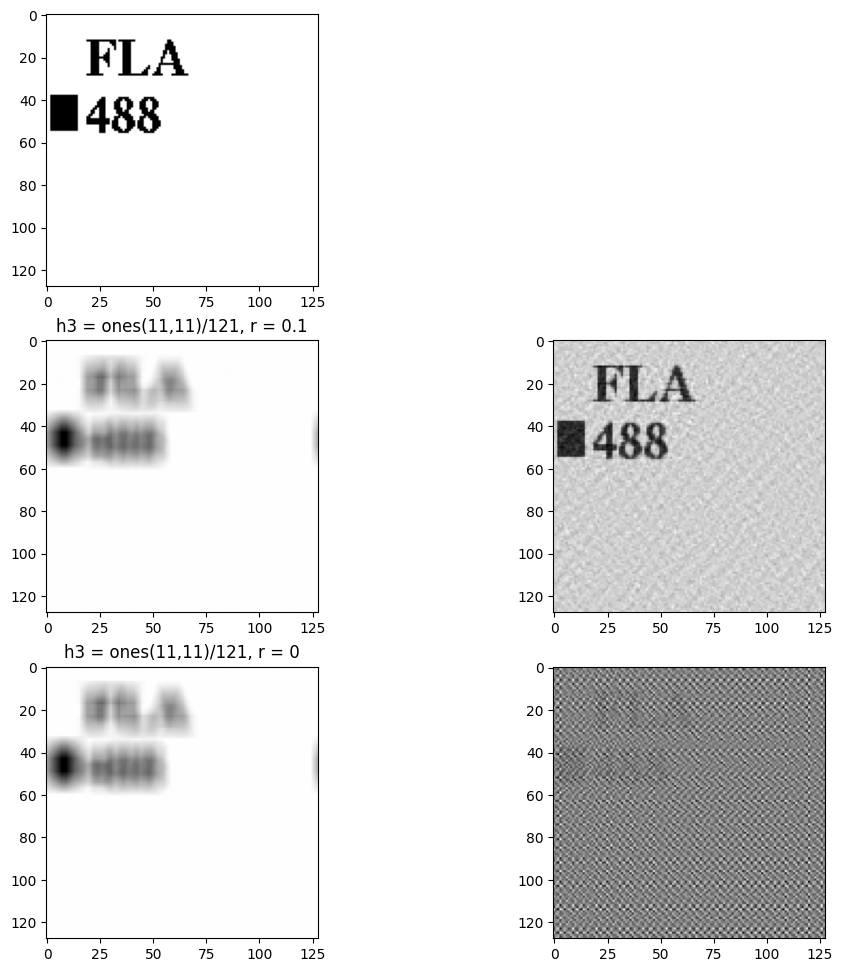

In [8]:
h3 = np.ones((11,11))/121
snr = 40
rho = 0.8
r_1 = 0.1
r_2 = 0


h_3_1, fhat_3_1 = wiener(f, h3, snr, rho, r_1)
h_3_2, fhat_3_2 = wiener(f, h3, snr, rho, r_2)

plt.figure(figsize=(12,12))
plt.subplot(321)
plt.imshow(f, cmap="gray")

plt.subplot(323)
plt.imshow(h_3_1, cmap="gray")
plt.title("h3 = ones(11,11)/121, r = 0.1")

plt.subplot(324)
plt.imshow(fhat_3_1, cmap="gray")

plt.subplot(325)
plt.imshow(h_3_2, cmap="gray")
plt.title("h3 = ones(11,11)/121, r = 0")

plt.subplot(326)
plt.imshow(fhat_3_2, cmap="gray")

### Question 6
* $r=0.1$ leads to good result
* $r=0$ leads to no guess of noise

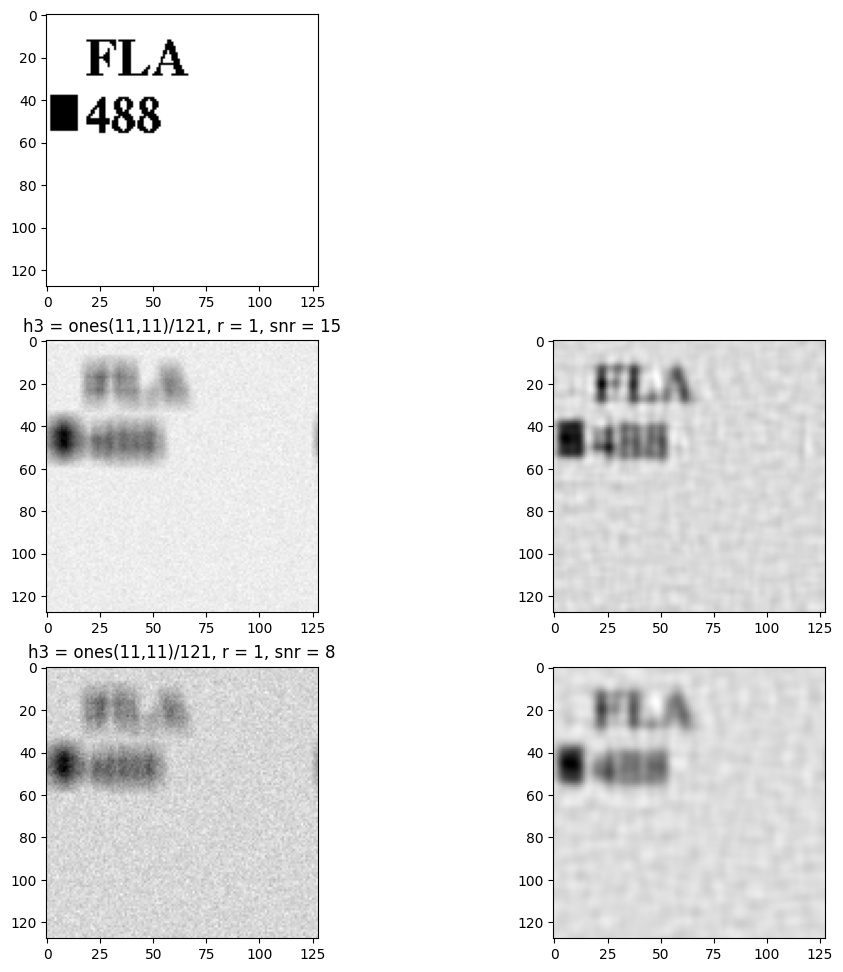

In [9]:
h3 = np.ones((11,11))/121
snr_1 = 15
snr_2 = 8
rho = 0.8
r_1 = 1


h_3_1, fhat_3_1 = wiener(f, h3, snr_1, rho, r_1)
h_3_2, fhat_3_2 = wiener(f, h3, snr_2, rho, r_1)

plt.figure(figsize=(12,12))
plt.subplot(321)
plt.imshow(f, cmap="gray")

plt.subplot(323)
plt.imshow(h_3_1, cmap="gray")
plt.title("h3 = ones(11,11)/121, r = 1, snr = 15")

plt.subplot(324)
plt.imshow(fhat_3_1, cmap="gray")

plt.subplot(325)
plt.imshow(h_3_2, cmap="gray")
plt.title("h3 = ones(11,11)/121, r = 1, snr = 8")

plt.subplot(326)
plt.imshow(fhat_3_2, cmap="gray")

### Question 7
* $SNR = 15$ leads to barely visible numbers
* $SNR = 8$ leads to barely visible text

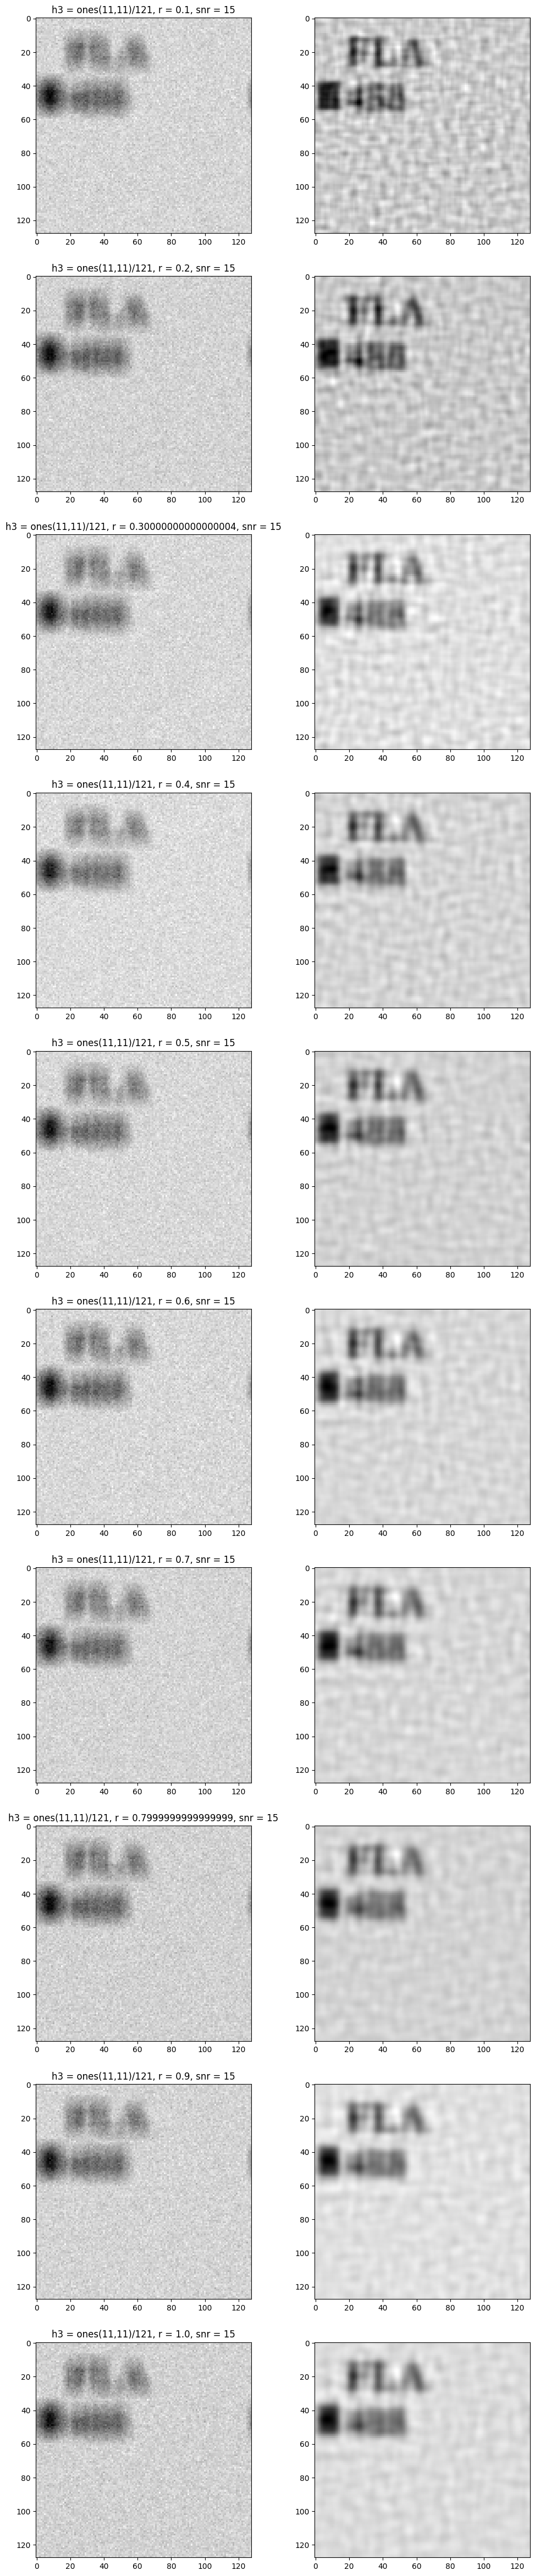

In [10]:
h3 = np.ones((11,11))/121
snr = 8
rho = 0.8
r_start = 0.1
r_end = 1


plt.figure(figsize=(12,60))
for r_i in range(10):
    h, fhat = wiener(f, h3, snr, rho, r_start + r_i/10)
    plt.subplot(10, 2, 2*r_i+1)
    plt.imshow(h, cmap="gray")
    plt.title("h3 = ones(11,11)/121, r = " + str(r_start + r_i/10) + ", snr = 15")
    plt.subplot(10, 2, 2*r_i+2)
    plt.imshow(fhat, cmap="gray")

### Question 8
It seems like the image quality becomes worse with higher r.
Even though that might be mathimatically correct.

The human might be able to interpret the image better when you do not account for noise. If you only try to fix the degraded image using inverse filtering, the brain might fix the noise on its own.

In [11]:
h_blur = np.array(((0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)))/15
print(h_blur)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667]


### Question 9
See above
"Long filter" but not "tall". All values are at one side of the center.

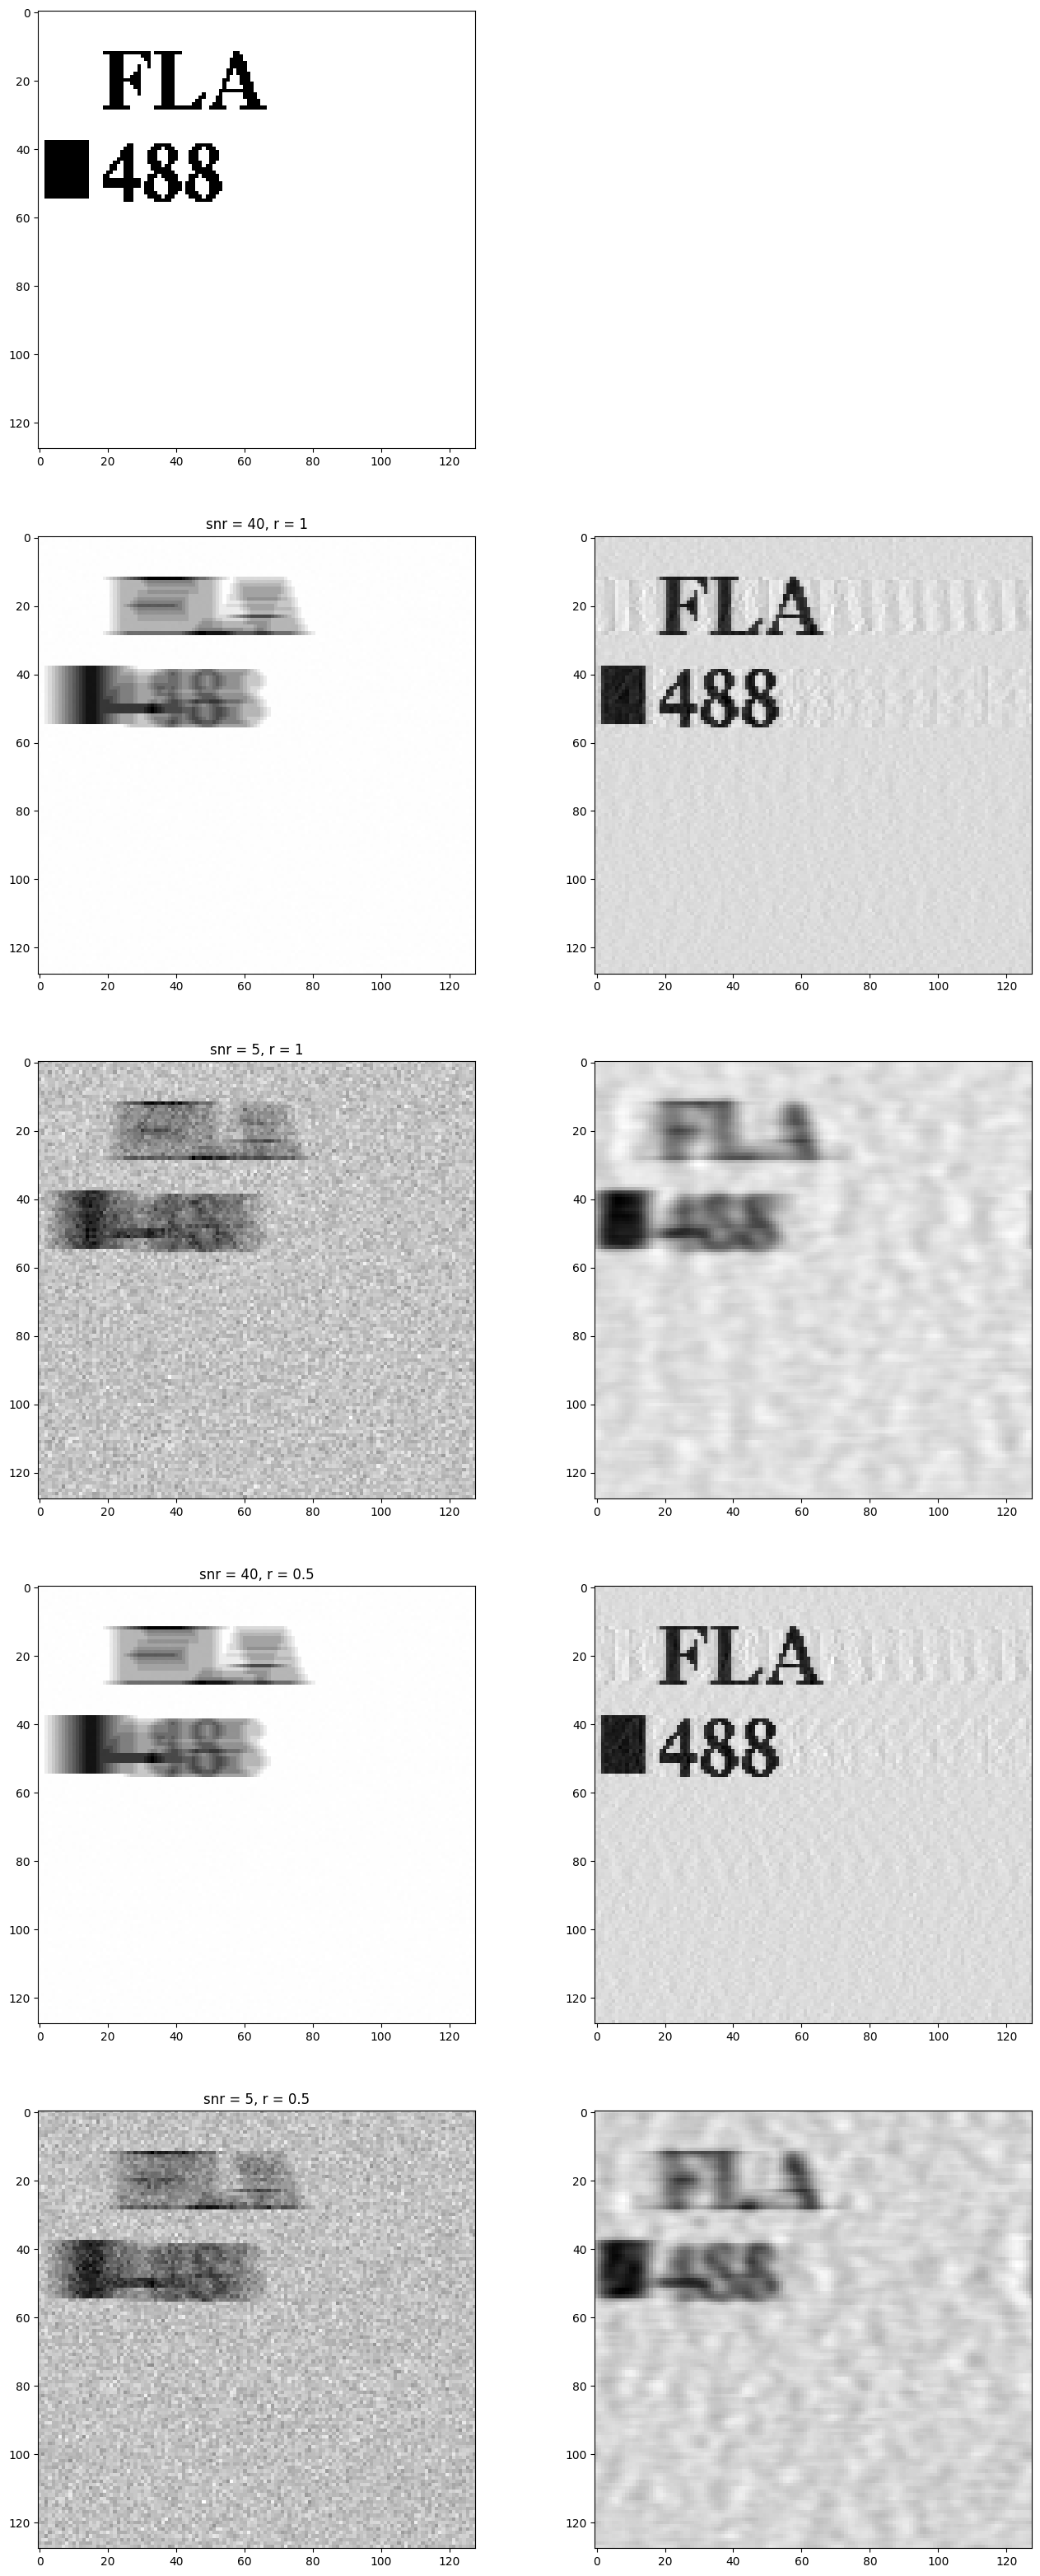

In [12]:
snr_1 = 40
snr_2 = 5

rho = 0.8
r_1 = 1.0
r_2 = 0.5

h_1_1, fhat_1_1 = wiener(f, h_blur, snr_1, rho, r_1)
h_2_1, fhat_2_1 = wiener(f, h_blur, snr_2, rho, r_1)
h_1_2, fhat_1_2 = wiener(f, h_blur, snr_1, rho, r_2)
h_2_2, fhat_2_2 = wiener(f, h_blur, snr_2, rho, r_2)

plt.figure(figsize=(16,40))
plt.subplot(521)
plt.imshow(f, cmap="gray")

plt.subplot(523)
plt.imshow(h_1_1, cmap="gray")
plt.title("snr = 40, r = 1")

plt.subplot(524)
plt.imshow(fhat_1_1, cmap="gray")

plt.subplot(525)
plt.imshow(h_2_1, cmap="gray")
plt.title("snr = 5, r = 1")


plt.subplot(526)
plt.imshow(fhat_2_1, cmap="gray")

plt.subplot(527)
plt.imshow(h_1_2, cmap="gray")
plt.title("snr = 40, r = 0.5")

plt.subplot(528)
plt.imshow(fhat_1_2, cmap="gray")

plt.subplot(529)
plt.imshow(h_2_2, cmap="gray")
plt.title("snr = 5, r = 0.5")

plt.subplot(5,2,10)
plt.imshow(fhat_2_2, cmap="gray")

The reconstructed filter looks really good. Almost like there is no degredation at all.
With low SNR the result is worse but the text is still readable.

### Question 10
Px = p, Py = p -> (p+p)/2 = 2
We could technically only used one of them but a average is better

In [13]:
def autocorr(im):
    f_hat = np.mean(im)
    print(f_hat)
    f_im = np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(im-f_hat)))
    f = f_im.conj() * f_im
    return np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(f)))

def rho(f):
    return (f[1,0]/f[0,0]+f[0,1]/f[0,0])/2

192.547607421875
163.55633544921875
123.49484252929688


C:\Users\NaabZer\AppData\Local\Temp\ipykernel_12156\2247343004.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  corr_s = autocorr(f).astype(np.int64)
C:\Users\NaabZer\AppData\Local\Temp\ipykernel_12156\2247343004.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  corr_f = autocorr(foppa).astype(np.int64)
C:\Users\NaabZer\AppData\Local\Temp\ipykernel_12156\2247343004.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  corr_b = autocorr(baboon).astype(np.int64)


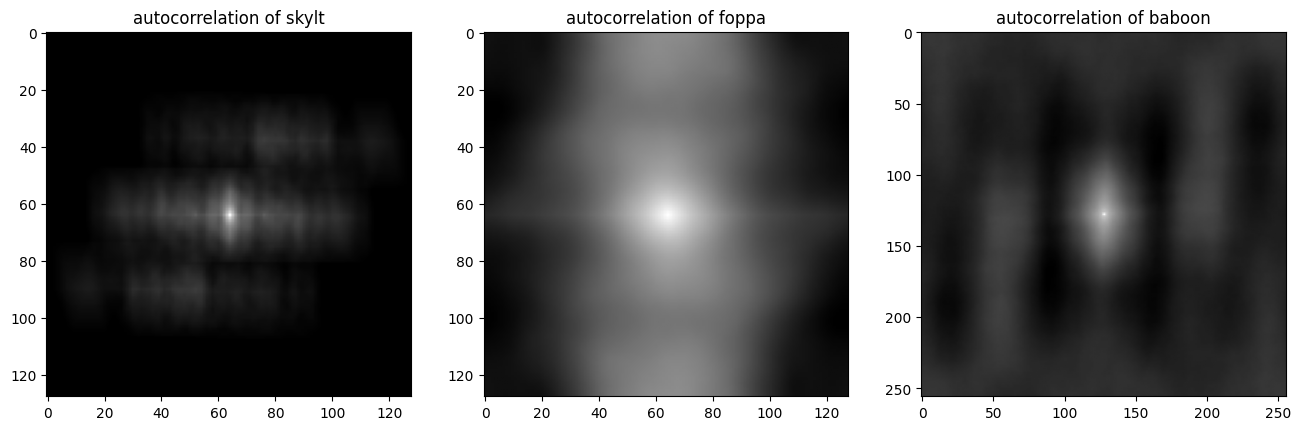

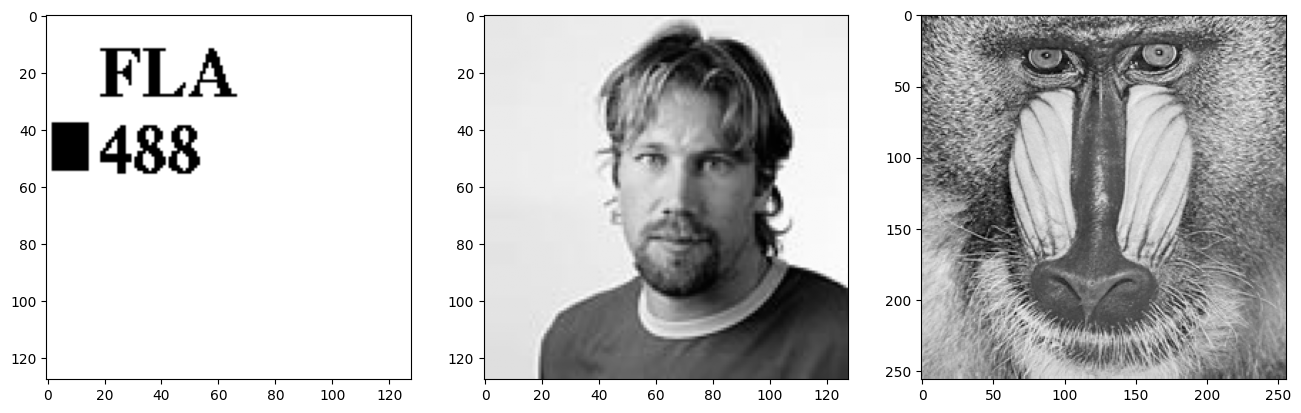

In [14]:
corr_s = autocorr(f).astype(np.int64)
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(corr_s, cmap="gray")
plt.title("autocorrelation of skylt")

foppa = np.array(Im.open("lab7files/foppa.tif"))
corr_f = autocorr(foppa).astype(np.int64)
plt.subplot(132)
plt.imshow(corr_f, cmap="gray")
plt.title("autocorrelation of foppa")

baboon = np.array(Im.open("lab7files/baboon256.tif"))
corr_b = autocorr(baboon).astype(np.int64)
plt.subplot(133)
plt.imshow(corr_b, cmap="gray")
plt.title("autocorrelation of baboon")

plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(f, cmap="gray")

plt.subplot(132)
plt.imshow(foppa, cmap="gray")

plt.subplot(133)
plt.imshow(baboon, cmap="gray")



### Question 11
At least Foppa looks similar to the sketch. The others look like the sketches at least in the middle.

One reason for bad orders can be because of convolution outside of bounds.

### Question 12
See below

In [15]:
print(rho(np.fft.fftshift(corr_s)))
print(rho(np.fft.fftshift(corr_f)))
print(rho(np.fft.fftshift(corr_b)))

0.795749075757386
0.9627654400518524
0.8246663480701693


# 2 Edge detection with Canny

### Question 13
No, to low threshold ~22 removes chimneys right part but keeps some part sticking up while to high threshold keeps to much of the tiles.
Even with T=22 we still have many tiles, see matlab code

### Question 14
We chose T=22
Keeps part of chimney while minimizing tiles

### Question 15
By "traversing" the edge we get more precise max values instead of also getting other values by thresholding
By looking at the edge normal, we introduce another requirement and therefor select less values

### Question 16
You get values you would not have gotten with thresholding
Hysteresis thresholds with lower value and tries to include the value

### Question 17
It selects
0.01875 and
0.046875

### Question 18
We select T=0.25
see matlab image

### Question 19

# 3 The Hough transform

### Question 20
![Question 20 sketch](images/tsbb20.png "Question 20")

### Question 21
![Question 21 sketch](images/tsbb21.png "Question 21")

Since we only have one point, this will draw each possible line found in the hough-curve

### DEMO E

{'point1': matlab.double([[1.0,1.0]]), 'point2': matlab.double([[64.0,64.0]]), 'theta': -45.0, 'rho': 0.0}


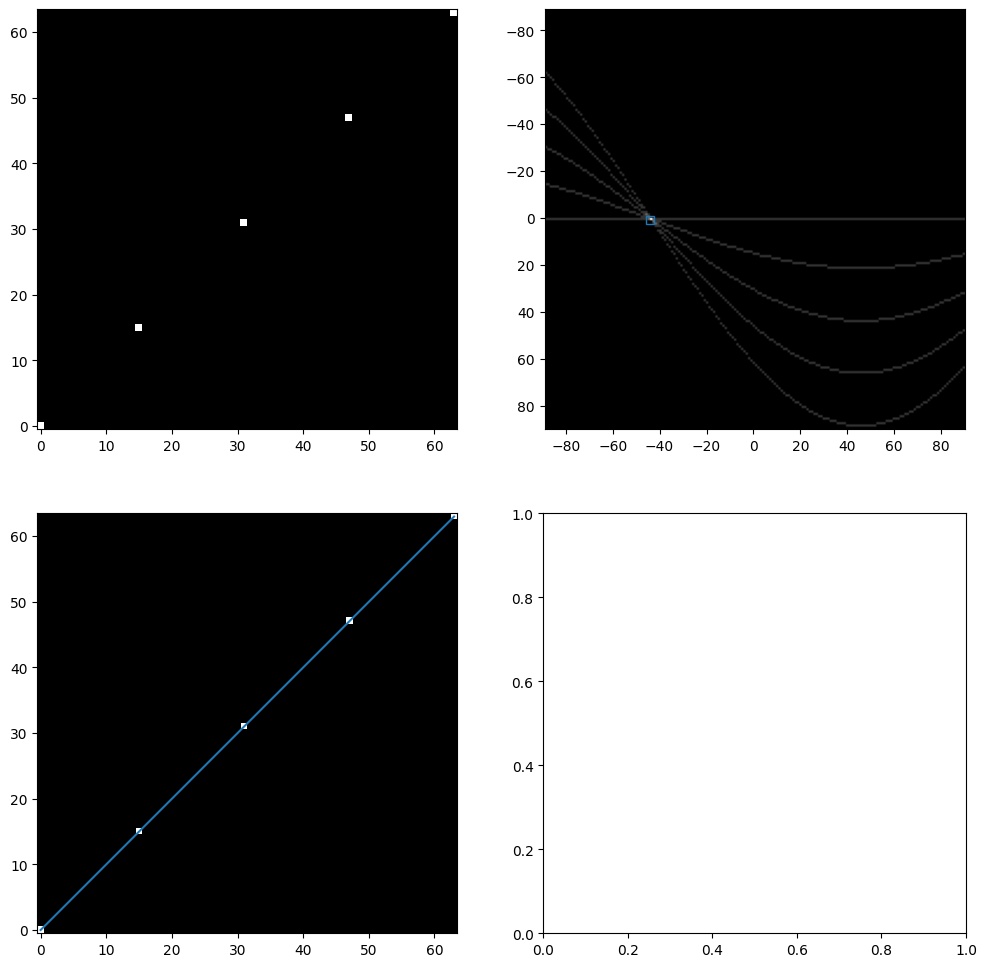

In [124]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))

im = np.zeros((64,64)); im[0,0] = 1;
im[15,15] = 1;
im[31,31] = 1;
im[47,47] = 1;
im[63,63] = 1;
ax1.imshow(im, cmap="gray", origin='lower')

[H, T, R] = eng.hough(im, 'Theta', matlab.double(np.arange(-90,90).tolist()), nargout=3)
new_ticks = np.linspace(0, 180, 13)
new_labels = np.linspace(-90, 90, 13)
ax2.imshow(H, cmap="gray", extent=[-90, 90, 90, -89])


P = eng.houghpeaks(H, matlab.double(10),'threshold', np.ceil(0.5*np.max(H)))
x = T[0][int(P[0][1])]
y = R[0][int(P[0][0])]
ax2.plot(x, y, marker='s', linestyle='-', markerfacecolor='none')

ax3.imshow(im, cmap="gray", origin='lower')
lines = eng.houghlines(np.ones((64, 64)),T,R,P)
xp = (lines['point1'][0][0]-1, lines['point2'][0][0]-1)
yp = (lines['point1'][0][0]-1, lines['point2'][0][0]-1)
print(lines)
ax3.plot(xp, yp, linestyle='-')
plt.show()

In [ ]:
figure(1)
subplot(2,2,1), imagesc(im);
axis image; axis xy; colorbar;
title('Image'),

% Call the Hough transform
% ========================
[H,T,R] = hough(im, 'Theta', -90:89);
subplot(2,2,2), imagesc(T,R,H);
xlabel('theta'), ylabel('rho');
title('Hough transform'), colorbar;

% Detect peaks
% ============
P  = houghpeaks(H,10,'threshold', ceil(0.5*max(H(:))));
x = T(P(:,2)); y = R(P(:,1));
hold on
plot(x,y,'s','color','red'), hold off

% Inverse Hough transform give Hough lines
% ========================================
lines = houghlines(ones(size(im)),T,R,P);

% Overlay Hough lines on image
% ============================
subplot(2,2,3), imagesc(im), hold on
title('Result'),
axis image; axis xy; colorbar;
for k = 1:length(lines)
  xy = [lines(k).point1; lines(k).point2];
  plot(xy(:,1),xy(:,2),'LineWidth',2,'Color','green');
end
hold off

### Question 22
Since all dots are in a straight line, in the Hough-curve, we get exactly one point where the lines for each dot intersects, which corresponds to the line that crosses all dots